In [1]:
%matplotlib inline

In [2]:
import gym
import numpy as np
import random as pr
import matplotlib.pyplot as plt

"""
Frozen-lake actions:
LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3
"""

def rargmax(vector):
    # Blotzman-like policy strategy
    m = np.amax(vector)
    indices = np.nonzero(vector==m)[0]
    return pr.choice(indices)

def degreedy(env, vector, episode, epsilon1=0.8, epsilon2=0, Nstop=500):
    gamma = np.max((Nstop-episode)/Nstop,0)
    epsilon = (epsilon1 - epsilon2) * gamma + epsilon2
    r = np.random.random()
    if r < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(vector)

def qlearn_base(env, Q, num_episodes=100):
    """
    action을 Q값에서 바로 결정 (단, 동일한 Q(s,a)들에 대해서는 확률적으로 선택함)
    - action = rargmax(Q[state,:])
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            action = rargmax(Q[state,:])
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = reward + np.max(Q[new_state,:])
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_random(env, Q, num_episodes=100):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            # action = rargmax(Q[state,:])
            action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = reward + np.max(Q[new_state,:])
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_discount(env, Q, num_episodes=100, discount=0.99):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            action = rargmax(Q[state,:])
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = reward + discount * np.max(Q[new_state,:])
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_discount_lr(env, Q, num_episodes=100, discount=0.99, lr=0.85):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            action = rargmax(Q[state,:])
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = (1-lr)*Q[state,action] + lr * (reward + discount * np.max(Q[new_state,:]))
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_random_discount_lr(env, Q, num_episodes=100, discount=0.99, lr=0.85):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            # action = rargmax(Q[state,:])
            action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = (1-lr)*Q[state,action] + lr * (reward + discount * np.max(Q[new_state,:]))
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_degreedy_discount_lr(env, Q, num_episodes=100, discount=0.99, lr=0.85, epsilon=0.8, Nstop=1000):
    """
    action을 random을 더해서 결정함.
    - action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
    """
    rList = []
    for i in range(num_episodes):
        state = env.reset()
        rAll = 0
        done = False
        while not done:
            # action = rargmax(Q[state,:])
            #action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i+1))
            action = degreedy(env, Q[state,:], i, epsilon1=epsilon, Nstop=Nstop)
            new_state, reward, done, _ = env.step(action)
            Q[state,action] = (1-lr)*Q[state,action] + lr * (reward + discount * np.max(Q[new_state,:]))
            state = new_state      
            # done까지 여기서는 reward가 한번 밖에 없음. 따라서 rAll은 reward를 사용해도 동일함.
            rAll += reward
        rList.append(rAll)        
    return rList

def qlearn_mode(mode, env, Q, num_episodes=100):
    if mode == 'base':
        return qlearn_base(env, Q, num_episodes=num_episodes)
    elif mode == 'random': # random action
        return qlearn_random(env, Q, num_episodes=num_episodes)        
    elif mode == 'discount':
        return qlearn_discount(env, Q, num_episodes=num_episodes)
    elif mode == 'discount_lr':
        return qlearn_discount_lr(env, Q, num_episodes=num_episodes)    
    elif mode == 'random_discount_lr':
        return qlearn_random_discount_lr(env, Q, num_episodes=num_episodes)    
    elif mode == 'degreedy_discount_lr':
        return qlearn_degreedy_discount_lr(env, Q, num_episodes=num_episodes)    
    
def run(mode, num_episodes=2000):
    print("Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr") 
    print(f'Current mode: {mode}')
    
    env = gym.make("FrozenLake-v0", map_name='4x4')
    Q = np.zeros([env.observation_space.n, env.action_space.n])

    rList = qlearn_mode(mode, env, Q, num_episodes)
    print(f"Total success rate: {sum(rList)/num_episodes}")
    plt.bar(range(len(rList)), 1-np.array(rList))
    plt.title('Show 1-reward')
    plt.show()

    print("Final Q-table")
    print(Q)
    print()

    print("Frozen-Lake Map at the Final State")
    # env.reset()
    env.render()
    print()

    print("Final action for each state in Q")
    action_list = ["LEFT", "DOWN", "RIGHT", "UP"]
    for i, q in enumerate(Q):
        print(action_list[np.argmax(q)], end=',')
        if i % 4 == 3:
            print()

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: base
Total success rate: 0.027


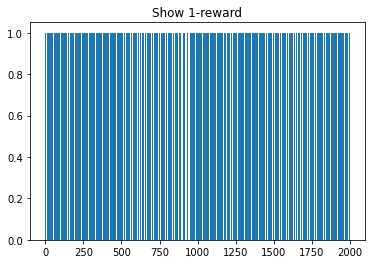

Final Q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]

Frozen-Lake Map at the Final State
  (Right)
SFFF
FHFH
FFFH
HFFG

Final action for each state in Q
LEFT,LEFT,LEFT,LEFT,
LEFT,LEFT,LEFT,LEFT,
LEFT,LEFT,LEFT,LEFT,
LEFT,RIGHT,DOWN,LEFT,


In [3]:
run('base')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: random
Total success rate: 0.027


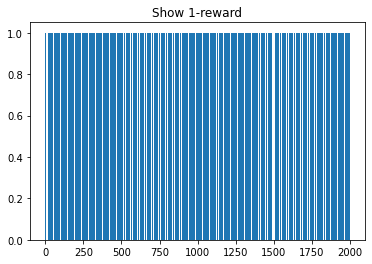

Final Q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]

Frozen-Lake Map at the Final State
  (Left)
SFFF
FHFH
FFFH
HFFG

Final action for each state in Q
LEFT,LEFT,LEFT,LEFT,
LEFT,LEFT,LEFT,LEFT,
LEFT,LEFT,LEFT,LEFT,
LEFT,LEFT,DOWN,LEFT,


In [4]:
run('random')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: discount
Total success rate: 0.0235


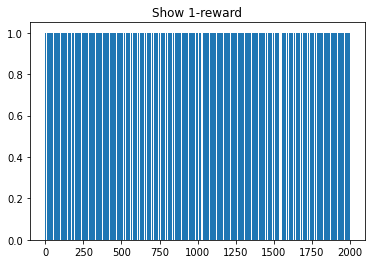

Final Q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]

Frozen-Lake Map at the Final State
  (Right)
SFFF
FHFH
FFFH
HFFG

Final action for each state in Q
LEFT,LEFT,LEFT,LEFT,
LEFT,LEFT,LEFT,LEFT,
LEFT,LEFT,LEFT,LEFT,
LEFT,LEFT,UP,LEFT,


In [5]:
run('discount')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: discount_lr
Total success rate: 0.0705


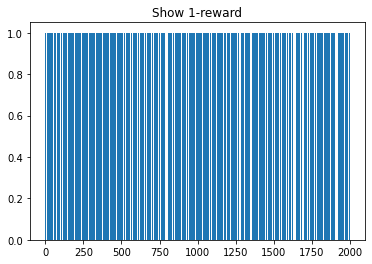

Final Q-table
[[0.00000000e+00 0.00000000e+00 4.09285814e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.64018343e-03]
 [0.00000000e+00 0.00000000e+00 1.33689656e-02 0.00000000e+00]
 [0.00000000e+00 1.81337602e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.86999944e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.33489374e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.27952501e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.34383797e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.38358325e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.88882959e-01 0.00000000e+00]
 [0.00000000e+00 9.98947060e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000000

In [6]:
run('discount_lr')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: random_discount_lr
Total success rate: 0.6425


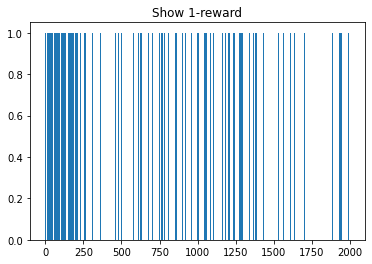

Final Q-table
[[3.44333559e-01 0.00000000e+00 4.30733812e-04 0.00000000e+00]
 [3.23177564e-05 2.56032929e-04 0.00000000e+00 5.63714878e-01]
 [4.19127004e-01 0.00000000e+00 8.18583386e-04 2.15451709e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.43133218e-01 0.00000000e+00 5.11864304e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.20418257e-04 2.97209418e-05 8.82235599e-05 2.08072956e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.52100618e-01]
 [2.03142570e-03 7.75177803e-01 6.51366411e-03 1.19549079e-02]
 [7.77391668e-01 3.70429797e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.27665323e-03 0.00000000e+00 9.41267044e-01 2.03188263e-03]
 [0.00000000e+00 9.89950002e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000000

In [7]:
run('random_discount_lr')

Supporting modes: base, random, discount, discount_lr, random_discount_lr, degreedy_discount_lr
Current mode: degreedy_discount_lr
Total success rate: 0.3515


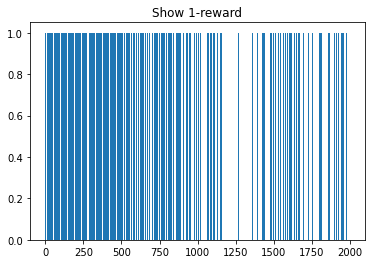

Final Q-table
[[7.71994193e-01 1.56295775e-02 1.56961810e-02 1.56674098e-02]
 [1.07207932e-02 9.62069007e-03 1.04148575e-02 6.49893674e-01]
 [9.02849529e-03 4.66815544e-03 6.62538493e-03 5.53943467e-01]
 [4.85571717e-03 5.46490721e-03 5.80634183e-03 4.67744937e-01]
 [7.72293933e-01 1.16687804e-02 9.88907767e-03 2.46973038e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.09310733e-05 6.63197578e-06 9.47834787e-02 8.65424521e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.82590374e-03 2.94581332e-03 2.31156771e-03 8.75254099e-01]
 [2.22836851e-03 8.86447969e-01 2.55220979e-03 4.24490590e-03]
 [6.64661367e-01 2.11886638e-04 6.53477779e-05 2.03934431e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.63492622e-02 2.97347397e-02 9.49158871e-01 3.16724357e-02]
 [5.88033145e-02 9.96738174e-01 1.18025764e-01 7.25712437e-02]
 [0.00000000e+00 0.00000000e+00 0.0000000

In [8]:
run('degreedy_discount_lr')